In [1]:
#imports
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
%matplotlib inline
plt.style.use('ggplot')



In [2]:
#read in the csv low_memory=False
df = pd.read_csv('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/data/NFL Play by Play 2009-2018 (v5).csv', low_memory=False)
#grab all plays that are not the end of a quarter
df = df[df['quarter_end'] == 0]
#potential columns to use for modeling
# df = df[['play_id', 'game_id', 'home_team', 'away_team', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100',
#         'game_date', 'game_seconds_remaining', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 
#         'total_home_score', 'total_away_score', 'posteam_score', 'defteam_score', 'ep', 'epa', 'wp', 'play_type', 
#         'third_down_converted', 'third_down_failed', 'fourth_down_converted', 'fourth_down_failed', 'penalty', 'touchdown',
#         'quarter_end', 'field_goal_result', 'kick_distance']]
#grabbing all 4th downs
df_4 = df[df['down'] == 4.0]
#converting game_date to datetime
date = pd.to_datetime(df_4['game_date'].values)
#setting columns for date and year
df_4['game_date'] = date
df_4['year'] = date.year

/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


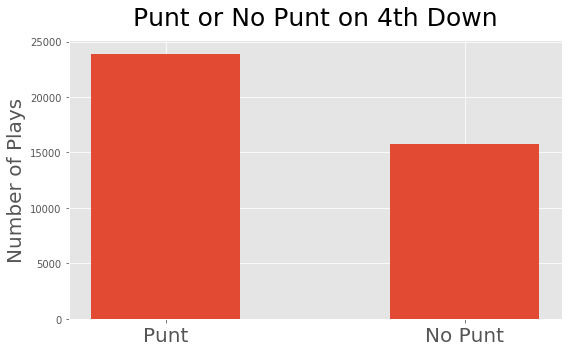

In [3]:
#percent of plays that are punt or no punt

plt.figure(figsize=(8,5))
plt.title('Punt or No Punt on 4th Down', size=25, pad=15)
plt.ylabel('Number of Plays', size=20)
plt.xticks(size=20)
plt.yticks(size=10)
plt.bar(['Punt', 'No Punt'], [df_4[df_4['play_type'] == 'punt'].shape[0] , df_4[df_4['play_type'] != 'punt'].shape[0]], width=0.5)
plt.tight_layout()
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/punt_nopunt.png');

In [3]:
df_4.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackl

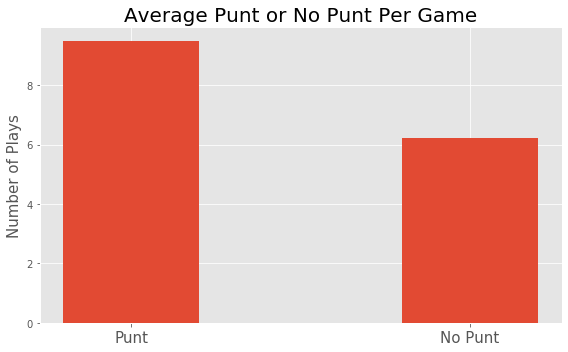

In [4]:
#finds average of punt per game
punt_per_game = df_4[df_4['play_type'] == 'punt'].groupby('game_id').count().iloc[:, 1].values
#finds average of no punt per game
notpunt_per_game = df_4[df_4['play_type'] != 'punt'].groupby('game_id').count().iloc[:, 1].values

#plots average of both
plt.figure(figsize=(8,5))
plt.title('Average Punt or No Punt Per Game', size=20)
plt.ylabel('Number of Plays', size=15)
plt.xticks(size=15)
plt.bar(['Punt', 'No Punt'], [np.mean(punt_per_game), np.mean(notpunt_per_game)], width=0.4)
plt.tight_layout()
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/avg_punt_game.png');

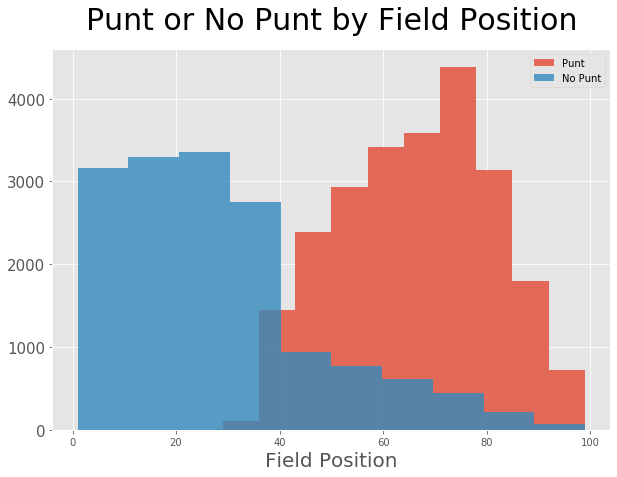

In [5]:
#distributino of punt or no punt based on field position
plt.figure(figsize=(10,7))
plt.title('Punt or No Punt by Field Position', size=30, pad=20)
plt.xlabel('Field Position', size=20)
plt.yticks(size=15)
plt.hist(df_4[df_4['play_type'] == 'punt']['yardline_100'].dropna().values, bins=10, alpha=0.8, label='Punt')
plt.hist(df_4[df_4['play_type'] != 'punt']['yardline_100'].dropna().values, bins=10, alpha=0.8, label='No Punt')
#plt.fill_between(x, np.exp(logprob), alpha=0.5)
plt.legend(fontsize='medium')
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/field_position.png');

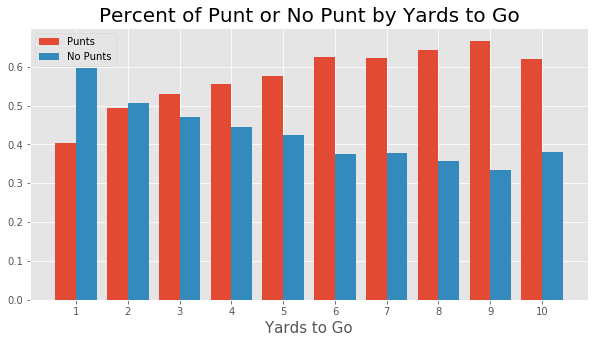

In [6]:
#grabs punt based on yards to go 
punt = df_4[df_4['play_type'] == 'punt'].groupby('ydstogo').count().iloc[:10, 1]
#grabs no punt based on yards to go 
not_punt = df_4[df_4['play_type'] != 'punt'].groupby('ydstogo').count().iloc[:10, 1]

#finds percent of total plays for first 10 yards 
#yard 1 should add up to 100%, same with all yard lines
pct_not_punt = []
pct_punt = []
for x, y in zip(not_punt, punt):
    pct_not_punt.append(x / (x + y))
    pct_punt.append(y / (x + y))

#plots yard line vs punt or no punt
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(np.arange(10)-0.2, pct_punt, width=0.4, label='Punts')

plt.title('Percent of Punt or No Punt by Yards to Go', size=20)
plt.xticks(ticks = np.arange(10), labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.xlabel('Yards to Go', size=15)
plt.bar(np.arange(10)+0.2, pct_not_punt, width=0.4, label='No Punts')
plt.legend(fontsize='medium')
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/yds_to_go.png');

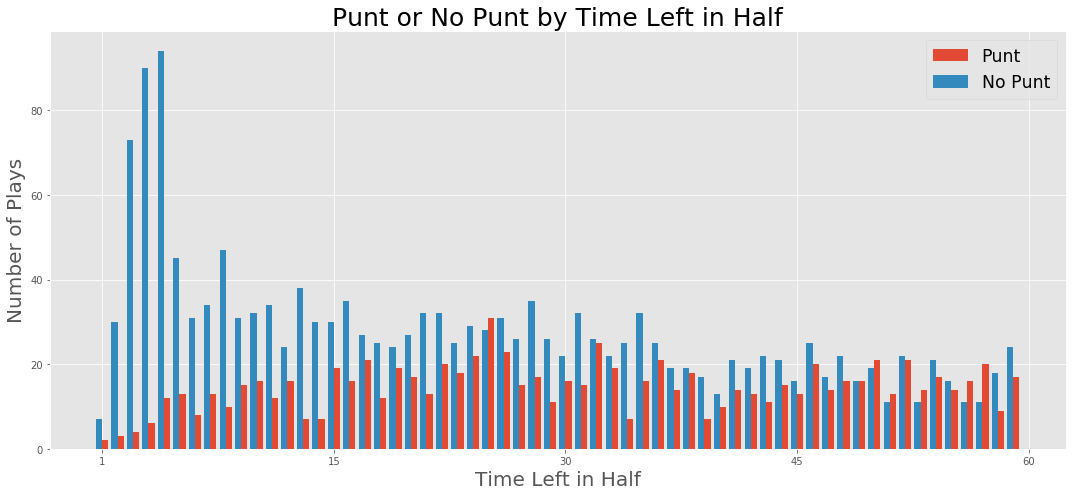

In [7]:
#grabs 1-60 seconds remaining in the half for punt and no punt plays
half_50_punt = df_4[df_4['play_type'] == 'punt'][['play_id', 'half_seconds_remaining']].groupby('half_seconds_remaining').count().iloc[:60]['play_id'].values
half_50_nopunt = df_4[df_4['play_type'] != 'punt'][['play_id', 'half_seconds_remaining']].groupby('half_seconds_remaining').count().iloc[:60]['play_id'].values

#plots using a bar graph 
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Punt or No Punt by Time Left in Half', size=25)
plt.bar(np.arange(60)+0.2, half_50_punt, label='Punt', width=0.4)
plt.bar(np.arange(60)-0.2, half_50_nopunt, label='No Punt', width=0.4)
plt.xticks(ticks=np.arange(0, 61, 15), labels=[1, 15, 30, 45, 60])
plt.xlabel('Time Left in Half', size=20)
plt.ylabel('Number of Plays', size=20)
plt.legend(fontsize='xx-large')
plt.tight_layout()
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/sec_left_half.png');

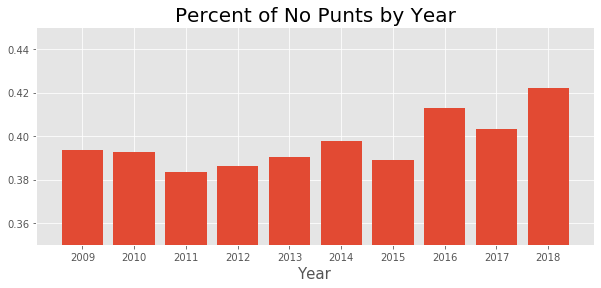

In [8]:
#grabs punt or no punt based on what year it was 
year_nopunt = df_4[df_4['play_type'] != 'punt'].groupby('year').count().iloc[:, 1].values
year_punt = df_4[df_4['play_type'] == 'punt'].groupby('year').count().iloc[:, 1].values

#calculating no punts over total punts for that year
total_year_pct = []
for x, y in zip(year_nopunt, year_punt):
    total_year_pct.append(x/(x+y))

plt.figure(figsize=(10, 4))
plt.title('Percent of No Punts by Year', size=20)
plt.ylim(.35, .45)
plt.xticks(df_4['year'].unique(), size=10)
plt.xlabel('Year', size=15)
plt.bar(df_4['year'].unique(), total_year_pct)
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/year.png');

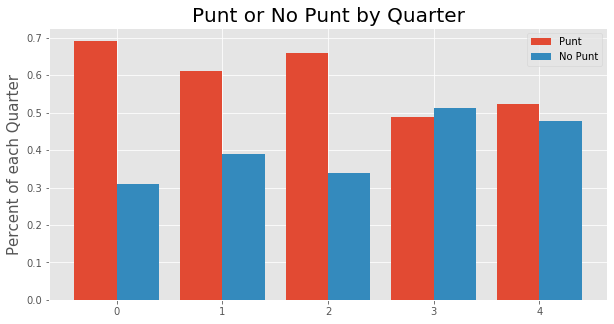

In [9]:
#grabs no punt or punt based on quarter
qtr_nopunt = df_4[df_4['play_type'] != 'punt'].groupby('qtr').count().iloc[:, 1].values
qtr_punt = df_4[df_4['play_type'] == 'punt'].groupby('qtr').count().iloc[:, 1].values

#calculates total % of punting or not punting
qtr_nopunt_totals = []
qtr_punt_totals = []
for x, y in zip(qtr_nopunt, qtr_punt):
    qtr_nopunt_totals.append(x / (x+y))
    qtr_punt_totals.append(y / (x + y))


fig, ax = plt.subplots(figsize=(10,5))
plt.title('Punt or No Punt by Quarter', size=20)
plt.ylabel('Percent of each Quarter', size=15)
plt.bar(np.arange(0, 5) - 0.2, qtr_punt_totals, label='Punt', width=0.4)
plt.bar(np.arange(0, 5) +0.2, qtr_nopunt_totals, label='No Punt', width=0.4)
#plt.xticks(ticks=np.arange(5), labels=['Q1', 'Q2', 'Q3', 'Q4', 'Overtime'], size=15)
plt.legend()
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/quarter.png');

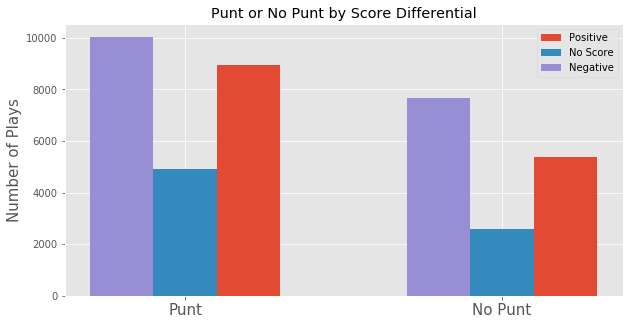

In [10]:
#calculates score differential 

#positive score different > 0
score_diff_punt = df_4[(df_4['play_type'] == 'punt') & (df_4['score_differential'] > 0)].shape[0]
#negative score differential <0
score_diffneg_punt = df_4[(df_4['play_type'] == 'punt') & (df_4['score_differential'] < 0)].shape[0]
#flush score differential 
score_diff0_punt = df_4[(df_4['play_type'] == 'punt') & (df_4['score_differential'] == 0)].shape[0]

#does the same for no punting 
score_diff_nopunt = df_4[(df_4['play_type'] != 'punt') & (df_4['score_differential'] > 0)].shape[0]
score_diffneg_nopunt = df_4[(df_4['play_type'] != 'punt') & (df_4['score_differential'] < 0)].shape[0]
score_diff0_nopunt = df_4[(df_4['play_type'] != 'punt') & (df_4['score_differential'] == 0)].shape[0]

#plots bar graph of each differential for punts and not punting
plt.figure(figsize=(10,5))
plt.bar(np.arange(2) + 0.2, [score_diff_punt, score_diff_nopunt], label='Positive', width=0.2)
plt.title('Punt or No Punt by Score Differential')
plt.bar(np.arange(2), [score_diff0_punt, score_diff0_nopunt], label='No Score', width=0.2)
plt.bar(np.arange(2) - 0.2, [score_diffneg_punt, score_diffneg_nopunt], label='Negative', width=0.2)
plt.xticks(ticks=[0,1], labels=['Punt', 'No Punt'], size=15)
plt.ylabel('Number of Plays', size=15)
plt.legend()
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/score_diff.png');

## These Plots emphasize 2 classifications, punting or not punting on 4th down.

The plan is to analyze similar features for 3 classifications on 4th down, field goals, punts, and "go for it".

In [5]:
#creates separate df for easier manipulation of code
punt_df = df_4[df_4['play_type'] == 'punt']
fg_df = df_4[df_4['play_type'] == 'field_goal']
not_punt_df = df_4[df_4['play_type'] != 'punt']
run_pass_df = df_4[(df_4['play_type'] == 'pass') | (df_4['play_type'] == 'run') | (df_4['play_type'] == 'qb_kneel')]

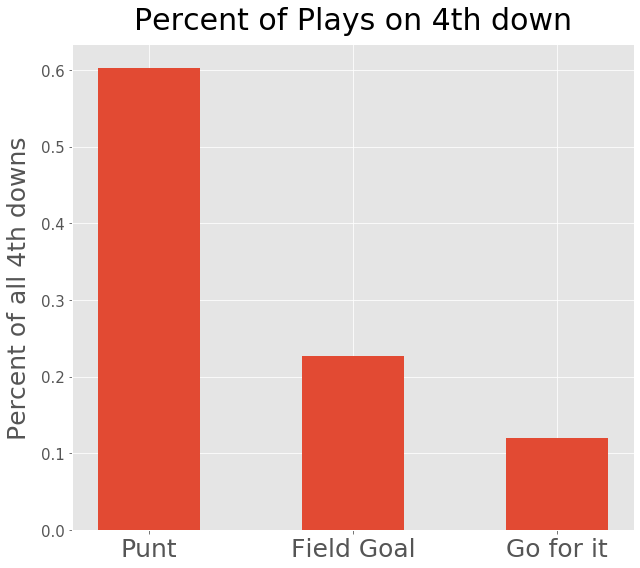

In [6]:
#finds total percent using how many rows in each df 
punt_pc = punt_df.shape[0] / df_4.shape[0]
fg_pc = fg_df.shape[0] / df_4.shape[0]
run_pass_pc = run_pass_df.shape[0] / df_4.shape[0]

plt.figure(figsize=(9,8))
plt.title('Percent of Plays on 4th down', size=30, pad=15)
plt.ylabel('Percent of all 4th downs', size=25, labelpad=10)
plt.xticks(size=25)
plt.yticks(size=15)
plt.bar(['Punt', 'Field Goal', 'Go for it'], [punt_pc, fg_pc, run_pass_pc], width=0.5)
plt.tight_layout()
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/pct_plays3.png', dpi=100);

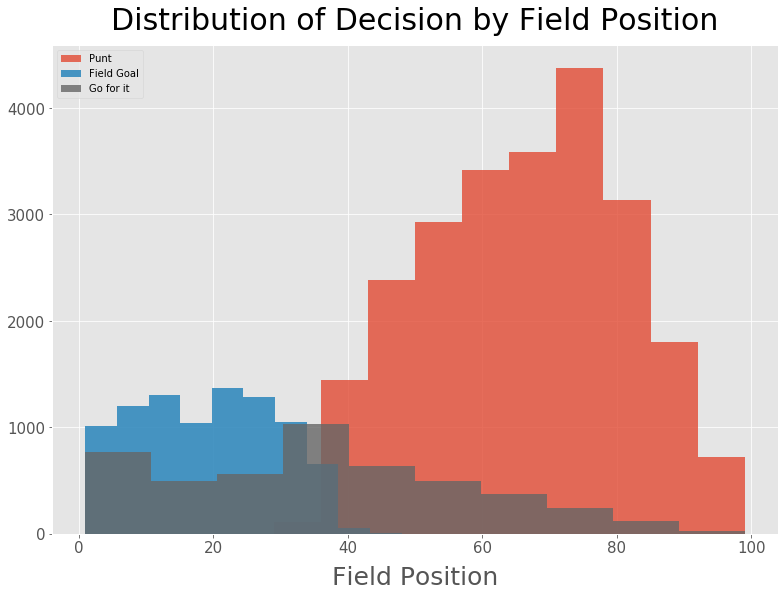

In [12]:
plt.figure(figsize=(13,9))
plt.title('Distribution of Decision by Field Position', size=30, pad=15)
plt.xlabel('Field Position', size=25, labelpad=10)
plt.xticks(size=15)
plt.yticks(size=15)
plt.hist(punt_df['yardline_100'].dropna().values, bins=10, alpha=0.8, label='Punt')
plt.hist(fg_df['yardline_100'].dropna().values, bins=10, alpha=0.9, label='Field Goal')
plt.hist(run_pass_df['yardline_100'].dropna().values, bins=10, alpha=0.8, label='Go for it', color='0.4')
#plt.fill_between(x, np.exp(logprob), alpha=0.5)
plt.legend(fontsize='medium', loc='upper left')
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/field_pos3.png', dpi=100);

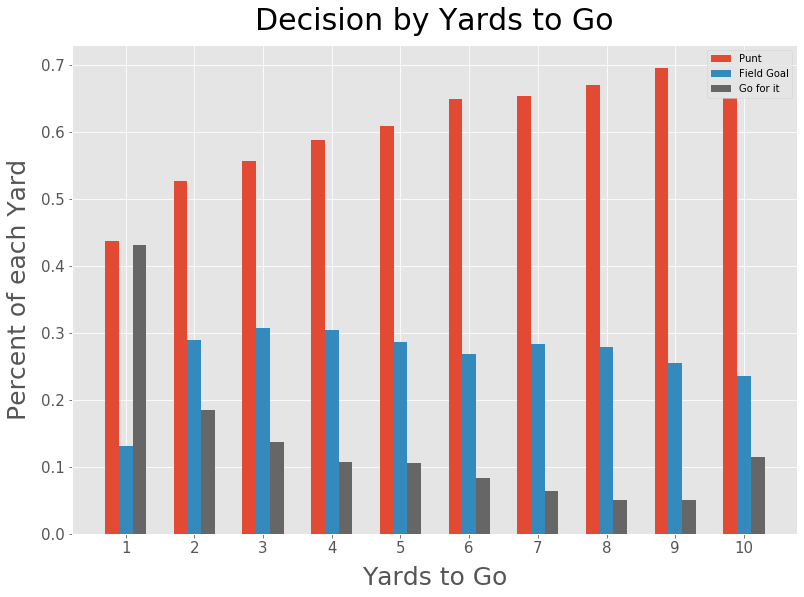

In [13]:
punt_ydstogo = punt_df.groupby('ydstogo').count().iloc[:10, 1]
fg_ydstogo = fg_df.groupby('ydstogo').count().iloc[:10, 1]
run_pass_ydstogo = run_pass_df.groupby('ydstogo').count().iloc[:10, 1]

pct_fg = []
pct_punt = []
pct_run_pass = []
for x, y, z in zip(punt_ydstogo, fg_ydstogo, run_pass_ydstogo):
    pct_punt.append(x / (x + y + z))
    pct_fg.append(y / (x + y + z))
    pct_run_pass.append(z / (x + y + z))

fig, ax = plt.subplots(figsize=(13,9))
plt.bar(np.arange(10)-0.2, pct_punt, width=0.2, label='Punt')
#plt.xticks([1, 2, 3, 4, 5,6 ,7, 8, 9, 10])
plt.title('Decision by Yards to Go', size=30, pad=15)
plt.xticks(ticks = np.arange(10), labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], size=15)
plt.yticks(size=15)
plt.xlabel('Yards to Go', size=25, labelpad=10)
plt.ylabel('Percent of each Yard', size=25, labelpad=10)
plt.bar(np.arange(10), pct_fg, width=0.2, label='Field Goal')
plt.bar(np.arange(10)+0.2, pct_run_pass, width=0.2, color='0.4', label='Go for it')
plt.legend(fontsize='medium')
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/yds_to_go3.png', dpi=100);

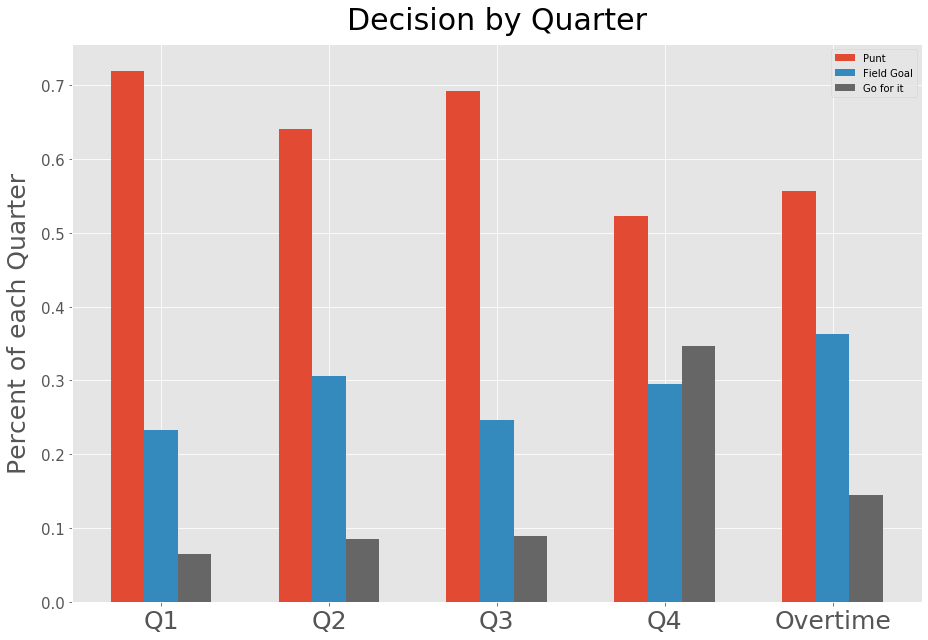

In [14]:
punt_qtr = punt_df.groupby('qtr').count().iloc[:, 1].values
fg_qtr = fg_df.groupby('qtr').count().iloc[:, 1].values
run_pass_qtr = run_pass_df.groupby('qtr').count().iloc[:, 1].values

fg_qtr_totals = []
punt_qtr_totals = []
run_pass_qtr_totals = []
for x, y, z in zip(punt_qtr, fg_qtr, run_pass_qtr):
    punt_qtr_totals.append(x / (x + y + z))
    fg_qtr_totals.append(y / (x + y))
    run_pass_qtr_totals.append(z / (x + y))

fig, ax = plt.subplots(figsize=(13,9))
plt.title('Decision by Quarter', size=30, pad=15)
plt.ylabel('Percent of each Quarter', size=25, labelpad=10)
plt.yticks(size=15)
plt.bar(np.arange(0, 5) - 0.2, punt_qtr_totals, label='Punt', width=0.2)
plt.bar(np.arange(0, 5), fg_qtr_totals, label='Field Goal', width=0.2)
plt.bar(np.arange(0, 5) +0.2, run_pass_qtr_totals, color='0.4', label='Go for it', width=0.2)
plt.xticks(ticks=np.arange(5), labels=['Q1', 'Q2', 'Q3', 'Q4', 'Overtime'], size=25)
plt.tight_layout()
plt.legend(fontsize='medium')
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/qtr3.png', dpi=100);

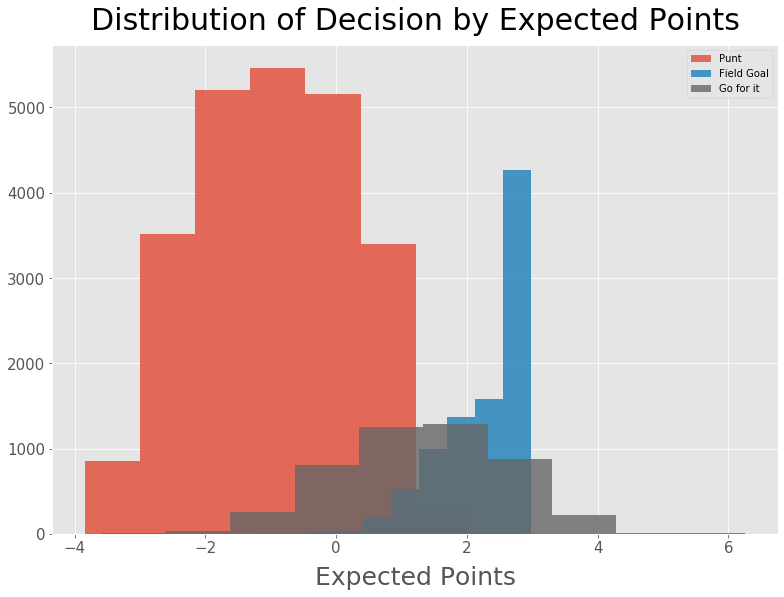

In [15]:
plt.figure(figsize=(13, 9))
plt.title('Distribution of Decision by Expected Points', size=30, pad=15)
plt.xlabel('Expected Points', size=25, labelpad=10)
plt.hist(punt_df['ep'], alpha=0.8, bins=10, label='Punt')
plt.hist(fg_df['ep'], alpha=0.9, bins=10, label='Field Goal')
plt.hist(run_pass_df['ep'], alpha=0.8, bins=10, label='Go for it', color='0.4')
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend()
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/expected_pnts3.png', dpi=100);

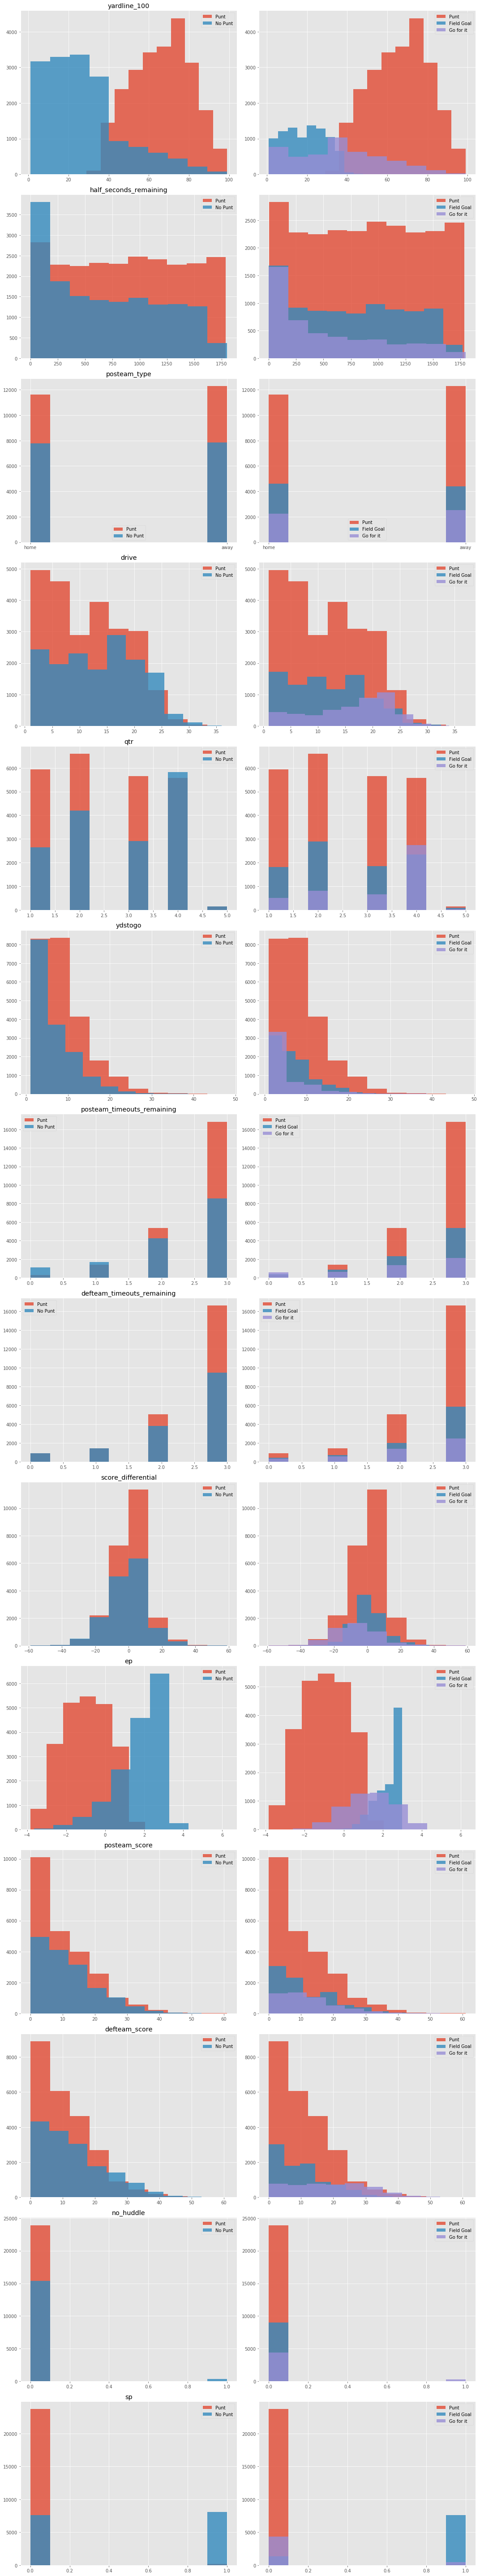

In [16]:
fig, ax = plt.subplots(14, 2, figsize=(15,80))
features = ['yardline_100', 'half_seconds_remaining', 'posteam_type', 'drive', 'qtr', 
            'ydstogo', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 
            'score_differential', 'ep', 'posteam_score', 'defteam_score', 'no_huddle', 'sp']
for i, feature in enumerate(features):
#for i, x in enumerate(features):
    #for j in range(2):
    ax[i, 0].hist(punt_df[feature].dropna().values, label='Punt', alpha=0.8)
    ax[i, 0].hist(not_punt_df[feature].dropna().values, label='No Punt',alpha=0.8) 
    ax[i, 0].legend()
    #ax[i, 0].tight_layout()
    
    ax[i,1].hist(punt_df[feature].dropna().values, label='Punt', alpha=0.8)
    ax[i,1].hist(fg_df[feature].dropna().values, label='Field Goal', alpha=0.8)  
    ax[i,1].hist(run_pass_df[feature].dropna().values, label='Go for it', alpha=0.8)
    ax[i, 0].set_title(feature)
    #ax[i, 1].tight_layout()
    
    ax[i, 1].legend()
        #ax[1,0].hist(punt_df['ydstogo'])
fig.tight_layout()